# Intro to data anlysis with `pandas`

# TOC

* Read data
* Select columns
* Indexing
* Aggregate & transform
* Group by
* Combine DataFrames
* Method chaining
* Missing data

## Tutorials


* Modern Pandas tutorials: http://tomaugspurger.github.io/modern-1-intro
* https://pandas.pydata.org/pandas-docs/stable/tutorials.html


To use pandas we need to import the package.

Per convention, this is usually done as pd

In [1]:
import pandas as pd

# Reading data

**Important functions**

* `pd.read_csv`
* `pd.read_excel`


In [2]:
df = pd.read_csv("data/data.txt")

`df.head` will print the first 5 lines of the DataFrame

In [3]:
df.head()

,group,score1,score2,sex
0,A,1.0,20,f
1,A,2.0,21,m
2,A,3.3,9,f
3,A,4.5,10,m
4,B,5.0,13,m


### Get column names

In [4]:
df.columns

Index(['group', 'score1', 'score2', 'sex'], dtype='object')

# Indexing
More details in the [Python Data Science Handbook chapter 3.2](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.02-Data-Indexing-and-Selection.ipynb)

### Select column

In [5]:
df["score1"]

0    1.0
1    2.0
2    3.3
3    4.5
4    5.0
5    4.4
6    6.3
7    2.1
Name: score1, dtype: float64

equivalent to

In [6]:
df.score1

0    1.0
1    2.0
2    3.3
3    4.5
4    5.0
5    4.4
6    6.3
7    2.1
Name: score1, dtype: float64

### Select multiple columns

In [7]:
df[["score1", "score2"]]

,score1,score2
0,1.0,20
1,2.0,21
2,3.3,9
3,4.5,10
4,5.0,13
5,4.4,17
6,6.3,17
7,2.1,10


### Select rows with the `.loc` attribute

In [8]:
ind = df["score1"] >= 5
type(ind)

pandas.core.series.Series

In [9]:
ind

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7    False
Name: score1, dtype: bool

In [10]:
df.loc[ind]

,group,score1,score2,sex
4,B,5.0,13,m
6,B,6.3,17,m


We can also do this with a single command

In [11]:
df.loc[df["score1"] >= 5]

,group,score1,score2,sex
4,B,5.0,13,m
6,B,6.3,17,m


We can do this with strings

In [12]:
df.loc[df["sex"] == "m"]

,group,score1,score2,sex
1,A,2.0,21,m
3,A,4.5,10,m
4,B,5.0,13,m
6,B,6.3,17,m


We can combine conditions

In [13]:
df.loc[(df["sex"] == "m") & (df["group"] == "B")]

,group,score1,score2,sex
4,B,5.0,13,m
6,B,6.3,17,m


Or as a query

In [14]:
df.query("sex=='m' & group=='B'")

,group,score1,score2,sex
4,B,5.0,13,m
6,B,6.3,17,m


We can cobine row and column selection

In [15]:
df.loc[(df["sex"] == "m") & (df["group"] == "B"), ["score1", "sex"]]

,score1,sex
4,5.0,m
6,6.3,m


## Setting values in selected data

In [16]:
# Let's create a copy of df, so that if we manipulate df_t, df remains unchanged
df_t = df.copy()
df_t

,group,score1,score2,sex
0,A,1.0,20,f
1,A,2.0,21,m
2,A,3.3,9,f
3,A,4.5,10,m
4,B,5.0,13,m
5,B,4.4,17,f
6,B,6.3,17,m
7,B,2.1,10,f


In [17]:
df_t.loc[df_t["score1"] < 4, "score1"] = 0

In [18]:
df_t

,group,score1,score2,sex
0,A,0.0,20,f
1,A,0.0,21,m
2,A,0.0,9,f
3,A,4.5,10,m
4,B,5.0,13,m
5,B,4.4,17,f
6,B,6.3,17,m
7,B,0.0,10,f


### Create new columns

In [19]:
df["data_available"] = True
df.head()

,group,score1,score2,sex,data_available
0,A,1.0,20,f,True
1,A,2.0,21,m,True
2,A,3.3,9,f,True
3,A,4.5,10,m,True
4,B,5.0,13,m,True


In [20]:
df["total_score"] = df["score1"] + df["score2"]
df.head()

,group,score1,score2,sex,data_available,total_score
0,A,1.0,20,f,True,21.0
1,A,2.0,21,m,True,23.0
2,A,3.3,9,f,True,12.3
3,A,4.5,10,m,True,14.5
4,B,5.0,13,m,True,18.0


equivalent to

In [21]:
df["total_score"] = df[["score1", "score2"]].sum(axis=1)
df.head()

,group,score1,score2,sex,data_available,total_score
0,A,1.0,20,f,True,21.0
1,A,2.0,21,m,True,23.0
2,A,3.3,9,f,True,12.3
3,A,4.5,10,m,True,14.5
4,B,5.0,13,m,True,18.0


# Aggregation and transformation


aggregation: returns a reduced version of the data (e.g., one mean value)

transformation: returns a transformed version of the data (e.g., centered values)



### First descriptives

In [22]:
df[["score1", "score2"]].mean()

score1     3.575
score2    14.625
dtype: float64

In [23]:
df[["score1", "score2"]].describe()

,score1,score2
count,8.000000,8.00000
mean,3.575000,14.62500
std,1.787057,4.74906
min,1.000000,9.00000
25%,2.075000,10.00000
50%,3.850000,15.00000
75%,4.625000,17.75000
max,6.300000,21.00000


### Describing categorical data

In [24]:
df.group.value_counts()

B    4
A    4
Name: group, dtype: int64

### Aggregate

In [25]:
df[["score1", "score2"]].aggregate(["min", "max", "median", "mean"])

,score1,score2
min,1.000,9.000
max,6.300,21.000
median,3.850,15.000
mean,3.575,14.625


### Transform
e.g. center data

In [26]:
def cent(x):
    return x - x.mean()


df["score1_centered"] = df["score1"].transform(cent)
df.head()

,group,score1,score2,sex,data_available,total_score,score1_centered
0,A,1.0,20,f,True,21.0,-2.575
1,A,2.0,21,m,True,23.0,-1.575
2,A,3.3,9,f,True,12.3,-0.275
3,A,4.5,10,m,True,14.5,0.925
4,B,5.0,13,m,True,18.0,1.425


In [27]:
df.score1_centered.mean()

-6.661338147750939e-16

# Split, apply, combine

Calculate something for each group separately

![](images/03.08-split-apply-combine.png)
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb

In [28]:
df.groupby("group").mean()

,score1,score2,data_available,total_score,score1_centered
group,,,,,
A,2.70,15.00,True,17.7,-0.875
B,4.45,14.25,True,18.7,0.875


In [29]:
df.groupby("group").sex.value_counts()

group  sex
A      f      2
       m      2
B      f      2
       m      2
Name: sex, dtype: int64

## You can also group by multiple variables

In [30]:
df_group_means = df.groupby(["group", "sex"]).mean()
df_group_means

score1  score2  data_available  total_score  score1_centered
group sex                                                              
A     f      2.15    14.5            True        16.65           -1.425
      m      3.25    15.5            True        18.75           -0.325
B     f      3.25    13.5            True        16.75           -0.325
      m      5.65    15.0            True        20.65            2.075

### Describe

In [31]:
df.groupby(["group", "sex"]).describe()

score1                                               score2        \
           count  mean       std  min    25%   50%    75%  max  count  mean   
group sex                                                                     
A     f      2.0  2.15  1.626346  1.0  1.575  2.15  2.725  3.3    2.0  14.5   
      m      2.0  3.25  1.767767  2.0  2.625  3.25  3.875  4.5    2.0  15.5   
B     f      2.0  3.25  1.626346  2.1  2.675  3.25  3.825  4.4    2.0  13.5   
      m      2.0  5.65  0.919239  5.0  5.325  5.65  5.975  6.3    2.0  15.0   

           ... total_score       score1_centered                          \
           ...         75%   max           count   mean       std    min   
group sex  ...                                                             
A     f    ...      18.825  21.0             2.0 -1.425  1.626346 -2.575   
      m    ...      20.875  23.0             2.0 -0.325  1.767767 -1.575   
B     f    ...      19.075  21.4             2.0 -0.325  1.626346 -1.475   
      m    ...      21.975  23.3             2.0  2.075  0.919239  1.425   

                                     
            25%    50%   75%    max  
group sex                            
A     f   -2.00 -1.425 -0.85 -0.275  
      m   -0.95 -0.325  0.30  0.925  
B     f   -0.90 -0.325  0.25  0.825  
      m    1.75  2.075  2.40  2.725  

[4 rows x 32 columns]

### Aggregate

In [32]:
df.groupby(["group", "sex"])["score1", "score2"].aggregate(
    ["min", "max", "median", "mean"]
)

<ipython-input-32-4b45f5324670>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["group", "sex"])["score1", "score2"].aggregate(


score1                   score2                 
             min  max median  mean    min max median  mean
group sex                                                 
A     f      1.0  3.3   2.15  2.15      9  20   14.5  14.5
      m      2.0  4.5   3.25  3.25     10  21   15.5  15.5
B     f      2.1  4.4   3.25  3.25     10  17   13.5  13.5
      m      5.0  6.3   5.65  5.65     13  17   15.0  15.0

### Transform

In [33]:
cent = lambda x: x - x.mean()  # this is called a lambda function
df["score1_centered_withingroup"] = df.groupby(["group", "sex"])["score1"].transform(
    cent
)
df.head()

,group,score1,score2,sex,data_available,total_score,score1_centered,score1_centered_withingroup
0,A,1.0,20,f,True,21.0,-2.575,-1.15
1,A,2.0,21,m,True,23.0,-1.575,-1.25
2,A,3.3,9,f,True,12.3,-0.275,1.15
3,A,4.5,10,m,True,14.5,0.925,1.25
4,B,5.0,13,m,True,18.0,1.425,-0.65


In [34]:
df.groupby(["group", "sex"])[["score1_centered", "score1_centered_withingroup"]].mean()

score1_centered  score1_centered_withingroup
group sex                                              
A     f             -1.425                 0.000000e+00
      m             -0.325                 0.000000e+00
B     f             -0.325                 2.220446e-16
      m              2.075                -4.440892e-16

# Exporting data
Export data, for instance, with

```python
df_group_means.to_csv("data/results.txt")
df_group_means.to_excel("data/results.xlsx")
```

# Combining DataFrames

For more see chapters 3.6 and 3.7 of the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

# Combining DataFrames

* **`pd.concat`**
![](images/concat.png)

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [35]:
df1 = pd.DataFrame({"sub": [1, 2, 3], "sex": ["f", "f", "f"]})
df2 = pd.DataFrame({"sub": [4, 5, 6], "sex": ["m", "m", "f"]})
df1

,sub,sex
0,1,f
1,2,f
2,3,f


In [36]:
df2

,sub,sex
0,4,m
1,5,m
2,6,f


In [37]:
df = pd.concat([df1, df2])
df

,sub,sex
0,1,f
1,2,f
2,3,f
0,4,m
1,5,m
2,6,f


Note that the index is take as is from the original data frames

In [38]:
df = pd.concat([df1, df2], ignore_index=True)
df

,sub,sex
0,1,f
1,2,f
2,3,f
3,4,m
4,5,m
5,6,f


# Combining DataFrames
* **`pd.merge`**
![](images/merge.png)

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [39]:
df1 = pd.DataFrame({"sub": [1, 2, 3, 4], "sex": ["f", "f", "f", "m"]})[["sub", "sex"]]
df2 = pd.DataFrame({"sub": [1, 3, 2], "hand": ["r", "l", "r"]})[["sub", "hand"]]
df1

,sub,sex
0,1,f
1,2,f
2,3,f
3,4,m


In [40]:
df2

,sub,hand
0,1,r
1,3,l
2,2,r


In [41]:
# looks for common keys
df = pd.merge(df1, df2)
df

,sub,sex,hand
0,1,f,r
1,2,f,r
2,3,f,l


In [42]:
# explicitly
df = pd.merge(df1, df2, on="sub")
df

,sub,sex,hand
0,1,f,r
1,2,f,r
2,3,f,l


### note that subject 4 is missing

In [43]:
df = pd.merge(df1, df2, on="sub", how="outer")
df

,sub,sex,hand
0,1,f,r
1,2,f,r
2,3,f,l
3,4,m,NaN


### if keys do not have same name

In [44]:
df1 = pd.DataFrame({"sub": [1, 2, 3, 4], "sex": ["f", "f", "f", "m"]})[["sub", "sex"]]
df2 = pd.DataFrame({"subject": [1, 3, 2], "hand": ["r", "l", "r"]})[["subject", "hand"]]
df1

,sub,sex
0,1,f
1,2,f
2,3,f
3,4,m


In [45]:
df2

,subject,hand
0,1,r
1,3,l
2,2,r


In [46]:
df = pd.merge(df1, df2, left_on="sub", right_on="subject")
df

,sub,sex,subject,hand
0,1,f,1,r
1,2,f,2,r
2,3,f,3,l


# Method chaining
Calling method after method.

See [Modern Pandas (Part 2): Method Chaining](http://tomaugspurger.github.io/method-chaining)

We already did this by calling `df.groupby("group").mean()`

In [47]:
df = pd.read_csv("data/data.txt")
df.groupby("group").mean()

,score1,score2
group,,
A,2.70,15.00
B,4.45,14.25


In [48]:
df = pd.read_csv("data/data.txt").rename(columns=str.upper)

In [49]:
df

,GROUP,SCORE1,SCORE2,SEX
0,A,1.0,20,f
1,A,2.0,21,m
2,A,3.3,9,f
3,A,4.5,10,m
4,B,5.0,13,m
5,B,4.4,17,f
6,B,6.3,17,m
7,B,2.1,10,f


In [50]:
df = (
    pd.read_csv("data/data.txt")
    .rename(columns=str.upper)
    .assign(total=lambda x: x["SCORE1"] + x["SCORE2"])
)

In [51]:
df

,GROUP,SCORE1,SCORE2,SEX,total
0,A,1.0,20,f,21.0
1,A,2.0,21,m,23.0
2,A,3.3,9,f,12.3
3,A,4.5,10,m,14.5
4,B,5.0,13,m,18.0
5,B,4.4,17,f,21.4
6,B,6.3,17,m,23.3
7,B,2.1,10,f,12.1


In [52]:
df = (
    pd.read_csv("data/data.txt")
    .rename(columns=str.upper)
    .assign(total=lambda x: x["SCORE1"] + x["SCORE2"])
    .drop("SCORE2", axis=1)
)

In [53]:
df

,GROUP,SCORE1,SEX,total
0,A,1.0,f,21.0
1,A,2.0,m,23.0
2,A,3.3,f,12.3
3,A,4.5,m,14.5
4,B,5.0,m,18.0
5,B,4.4,f,21.4
6,B,6.3,m,23.3
7,B,2.1,f,12.1


# Missing data


In [54]:
df = pd.read_csv("data/data_missing.txt")
df.head()

,subject,sex,age,score
0,sub0,F,NaN,70.0
1,sub1,M,NaN,NaN
2,sub2,F,NaN,55.0
3,sub3,M,NaN,79.0
4,sub4,F,NaN,40.0


In [55]:
df.isnull().head()

,subject,sex,age,score
0,False,False,True,False
1,False,False,True,True
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [56]:
df.isnull().sum()

subject     0
sex         0
age        26
score       4
dtype: int64

## Drop missings

In [57]:
df_clean = df.dropna()
df_clean.isnull().sum()

subject    0
sex        0
age        0
score      0
dtype: int64

## Impute missings

In [58]:
df["age"].fillna(df["age"].mean(), inplace=True)

In [59]:
df.head()

,subject,sex,age,score
0,sub0,F,56.472973,70.0
1,sub1,M,56.472973,NaN
2,sub2,F,56.472973,55.0
3,sub3,M,56.472973,79.0
4,sub4,F,56.472973,40.0


In [60]:
df.isnull().sum()

subject    0
sex        0
age        0
score      4
dtype: int64

## Missing data visualization with `missingno` package
`pip install missingno`

In [61]:
df = pd.read_csv("data/data_missing.txt")
df.head()

,subject,sex,age,score
0,sub0,F,NaN,70.0
1,sub1,M,NaN,NaN
2,sub2,F,NaN,55.0
3,sub3,M,NaN,79.0
4,sub4,F,NaN,40.0


In [62]:
import missingno as msno

%matplotlib inline

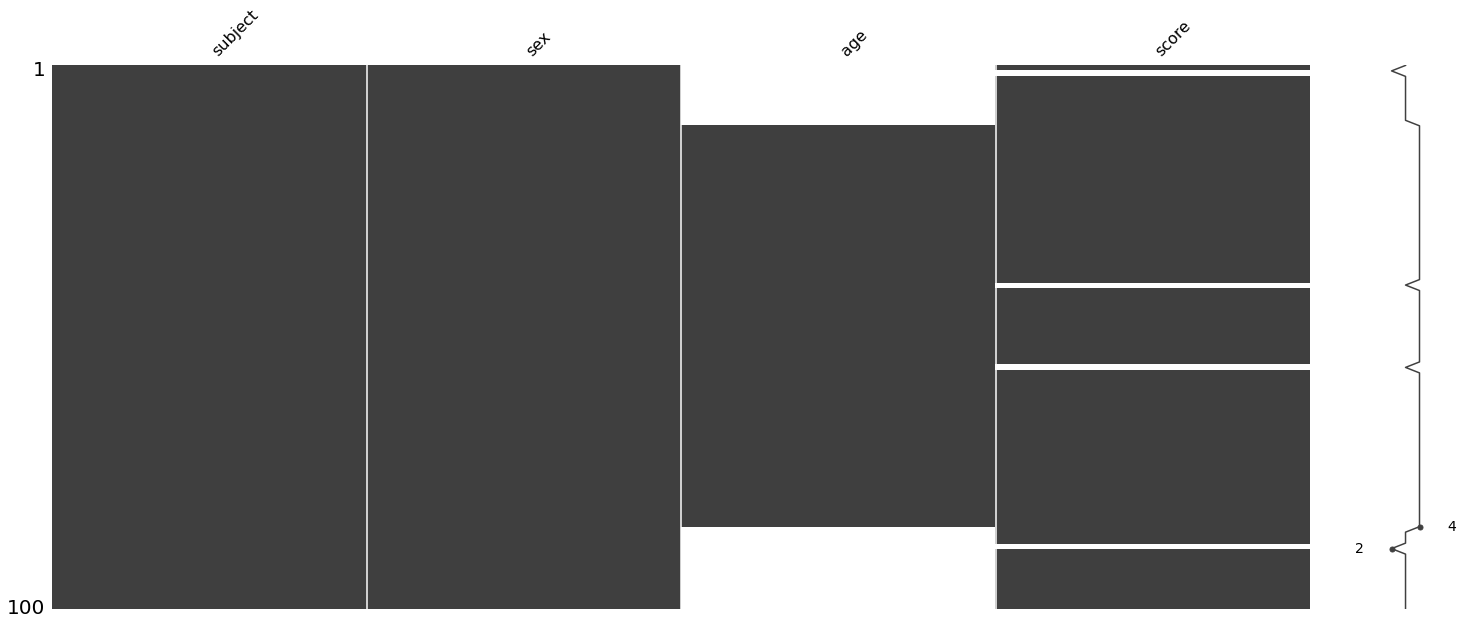

In [63]:
msno.matrix(df)

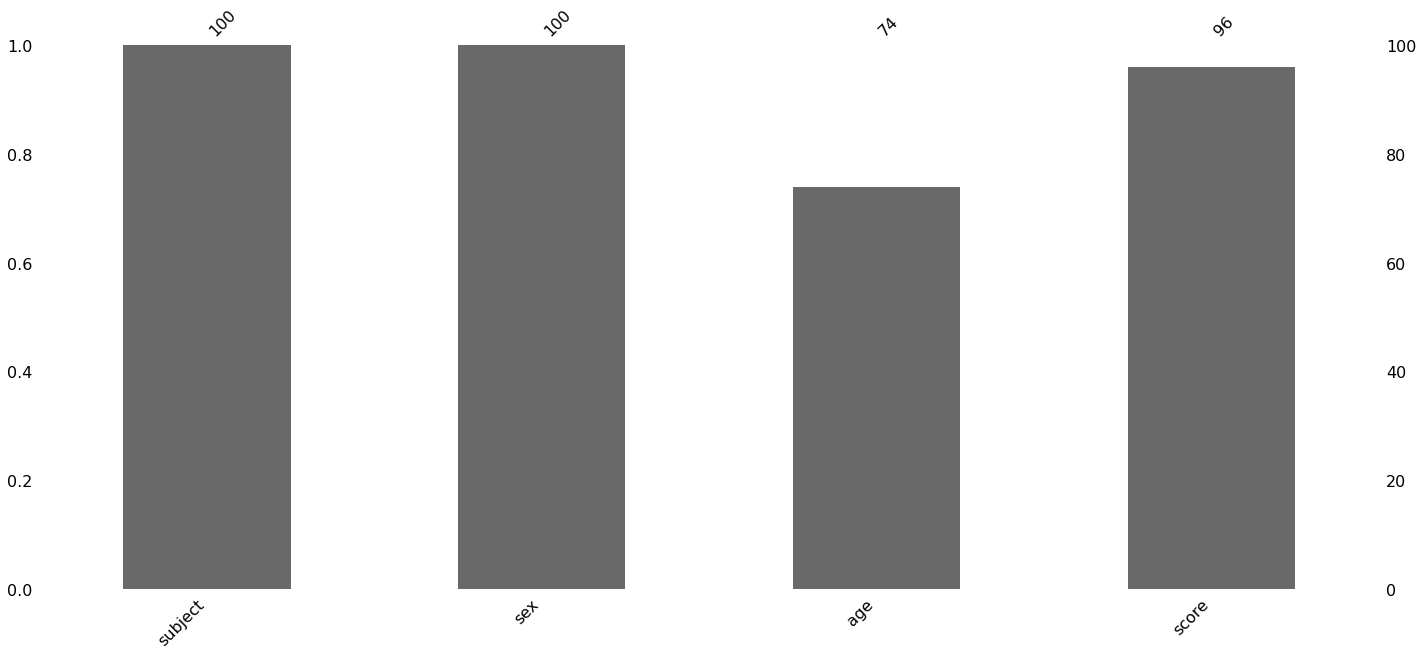

In [64]:
msno.bar(df)

# Exercise `exercises/pandas_combine_data.ipynb`